### Mohsin Shah 
**Project:** Brain Tumor Prediction

### Importing Required Library

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, Sequential, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Read Train dataset

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "Training",
    shuffle = True,
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5712 files belonging to 4 classes.


### Read Test dataset

In [11]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "Testing",
    shuffle = True,
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 1311 files belonging to 4 classes.


In [12]:
train_size = int(0.9*len(train_ds))
valid_size = int(0.1*len(train_ds))
train_size, valid_size

(161, 17)

In [14]:
train_data = train_ds.take(train_size)
valid_data = train_ds.skip(train_size)
len(train_data) , len(valid_data), len(test_data)

(161, 18, 41)

In [16]:
class_name = train_ds.class_names
class_name

['glioma', 'meningioma', 'notumor', 'pituitary']

### For Image_Data_Generator

In [21]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 10
)

train_generator = train_datagen.flow_from_directory(
    directory="Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",
    shuffle=True
)

Found 5712 images belonging to 4 classes.


### Visualize the Data

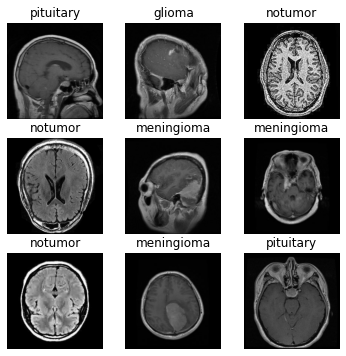

In [17]:
plt.figure(figsize = (6,6))

for image_batch, label_batch in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_name[label_batch[i]])
    plt.axis('off')

### Preprocessing

In [24]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
valid_data = valid_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

### Convalution Neural Network Model

In [20]:
Resnet50 = tf.keras.applications.ResNet50(
    include_top = False,
    weights="imagenet",
    input_shape = (256,256,3),
    classes = 4
)

In [21]:
Resnet_Model = Sequential()
Resnet50.trainable = False

Resnet_Model.add(Resnet50)
Resnet_Model.add(layers.Flatten())
Resnet_Model.add(layers.Dense(512, activation = 'relu'))
Resnet_Model.add(layers.Dense(4, activation = 'softmax'))


In [22]:
Resnet_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               67109376  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 90,699,140
Trainable params: 67,111,428
Non-trainable params: 23,587,712
_________________________________________________________________


In [23]:
Resnet_Model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [25]:
Resnet50_history = Resnet_Model.fit(
    train_data,
    epochs = 4,
    validation_data = valid_data
)

Epoch 1/4
161/161 [==============================] - 532s 3s/step - loss: 7.9287 - accuracy: 0.8558 - val_loss: 1.3296 - val_accuracy: 0.9250
Epoch 2/4
161/161 [==============================] - 580s 4s/step - loss: 0.4131 - accuracy: 0.9631 - val_loss: 0.6099 - val_accuracy: 0.9625
Epoch 3/4
161/161 [==============================] - 1313s 8s/step - loss: 0.1343 - accuracy: 0.9818 - val_loss: 0.6636 - val_accuracy: 0.9482
Epoch 4/4
161/161 [==============================] - 2314s 14s/step - loss: 0.1184 - accuracy: 0.9851 - val_loss: 0.6983 - val_accuracy: 0.9482


In [26]:
Resnet50_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

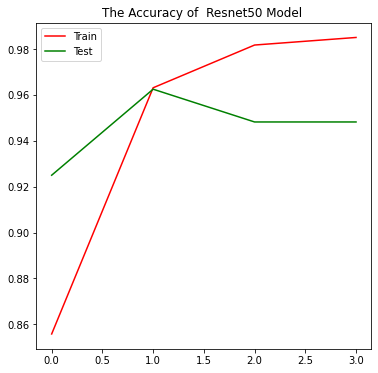

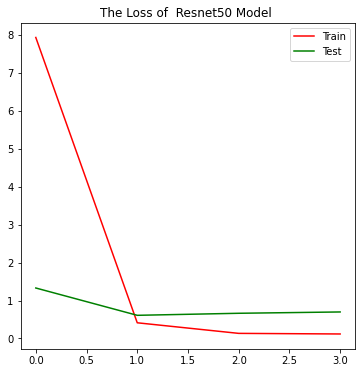

In [29]:
plt.figure(figsize = (6,6))
plt.plot(range(4),Resnet50_history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(range(4),Resnet50_history.history['val_accuracy'], color = 'green', label = 'Test')
plt.title('The Accuracy of  Resnet50 Model ')
plt.legend()
plt.show()
plt.figure(figsize = (6,6))
plt.plot(range(4),Resnet50_history.history['loss'], color = 'red', label = 'Train')
plt.plot(range(4),Resnet50_history.history['val_loss'], color = 'green', label = 'Test')
plt.title('The Loss of  Resnet50 Model ')
plt.legend()
plt.show()

### NoTumor Prediction

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Read the image using OpenCV
notumor = cv2.imread("no_tumor.jpg")


In [44]:
# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
notumor_rgb = cv2.cvtColor(notumor, cv2.COLOR_BGR2RGB)

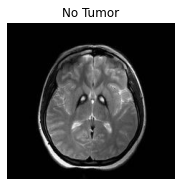

In [45]:
plt.figure(figsize=(3, 3))
plt.imshow(notumor_rgb)
plt.title("No Tumor")
plt.axis("off")
plt.show()

In [48]:
notumor_rgb.shape

(218, 234, 3)

In [49]:
notumor.shape

(218, 234, 3)

In [50]:
# Now we have to reshape and resize the image
notumor = cv2.resize(notumor, (256, 256))
notumor = notumor.reshape(1,256, 256, 3)

In [51]:
Pred_tumor = Resnet_Model.predict(notumor)

In [52]:
print("Predicted tumor = ", class_name[np.argmax(Pred_tumor[0])])

Predicted tumor =  notumor


### Pituitary Tumor Prediction

In [53]:
pituitary_tumor = cv2.imread("pituitary.jpg")
# convert it RGB format
pituitary_tumor_rgb = cv2.cvtColor(pituitary_tumor, cv2.COLOR_BGR2RGB)

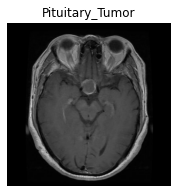

In [54]:
plt.figure(figsize=(3, 3))
plt.imshow(pituitary_tumor_rgb)
plt.title("Pituitary_Tumor")
plt.axis("off")
plt.show()

In [55]:
# Resizze and reshape the image
pituitary_tumor= cv2.resize(pituitary_tumor, (256, 256))
pituitary_tumor = pituitary_tumor.reshape(1,256, 256, 3)

In [59]:
Pred_tumor = Resnet_Model.predict(pituitary_tumor)
print("Predicted Tumor is : ", class_name[np.argmax(Pred_tumor[0])])

Predicted Tumor is :  pituitary


### Glioma Tumor Prediction

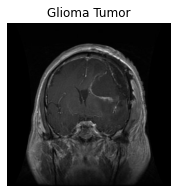

In [61]:
glioma_tumor = cv2.imread("glioma.jpg")
# convert it RGB format
glioma_tumor_rgb = cv2.cvtColor(pituitary_tumor, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(3, 3))
plt.imshow(glioma_tumor_rgb)
plt.title("Glioma Tumor")
plt.axis("off")
plt.show()

In [62]:
# Resizze and reshape the image
glioma_tumor = cv2.resize(glioma_tumor, (256, 256))
glioma_tumor = glioma_tumor.reshape(1,256, 256, 3)
glioma_tumor = Resnet_Model.predict(glioma_tumor)
print("Predicted Tumor is : ", class_name[np.argmax(glioma_tumor[0])])

Predicted Tumor is :  glioma


### Create a stremlit model

In [64]:
Resnet_Model.save("Brain_tumor.h5")

C:\Users\Mohsin\anaconda3\envs\Deep_learnings\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
